<a href="https://colab.research.google.com/github/Mena-Rossini-R/ML_Blended/blob/main/LinearRegression/HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the DataSet**

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Data Preprocessing**

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select a few important features
features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
target = 'SalePrice'

# Drop rows with missing values in selected features
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Ridge and Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train and Evaluation of Different models**

---



**1- Simple Linear Regression**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use only GrLivArea
X_simple = X[['GrLivArea']]
X_train_simple = X_train[['GrLivArea']]
X_test_simple = X_test[['GrLivArea']]

simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

y_pred_simple = simple_lr.predict(X_test_simple)

r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print("Simple Linear Regression (GrLivArea):")
print(f"R²: {r2_simple:.3f}")
print(f"RMSE: {rmse_simple:.2f}")


Simple Linear Regression (GrLivArea):
R²: 0.554
RMSE: 58471.76


Graph

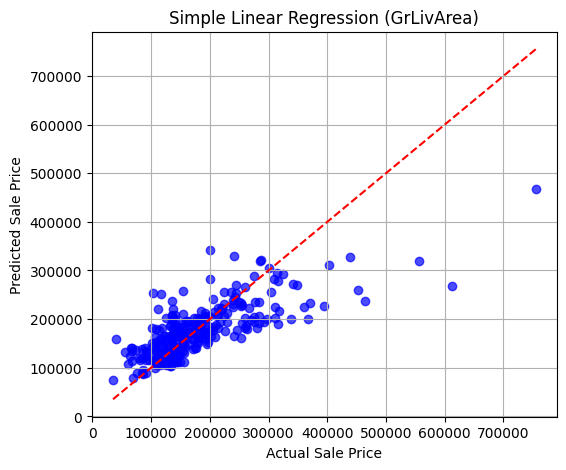

In [14]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_simple, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Simple Linear Regression (GrLivArea)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


**2 - Multiple Linear Regression**



In [4]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

y_pred_multi = multi_lr.predict(X_test)

r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("Multiple Linear Regression:")
print(f"R²: {r2_multi:.3f}")
print(f"RMSE: {rmse_multi:.2f}")


Multiple Linear Regression:
R²: 0.794
RMSE: 39763.30


In [ ]:
Graph

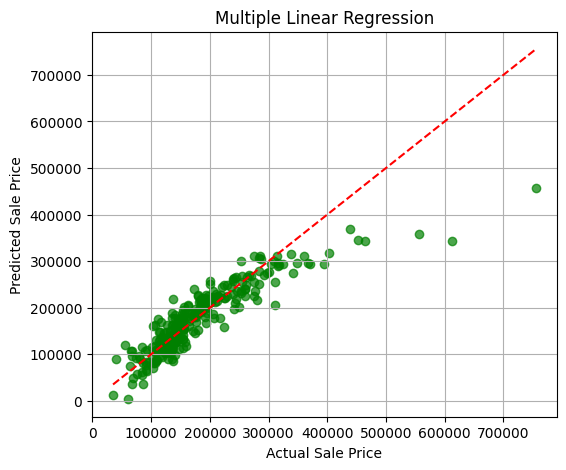

In [15]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_multi, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


**3 - Ridge Regression**

In [5]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression:")
print(f"R²: {r2_ridge:.3f}")
print(f"RMSE: {rmse_ridge:.2f}")


Ridge Regression:
R²: 0.793
RMSE: 39807.84


Graph

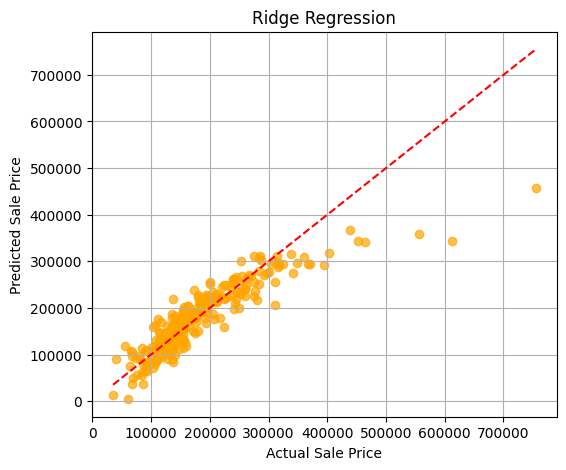

In [16]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Ridge Regression')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


**4 - Lasso Regression**

In [6]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression:")
print(f"R²: {r2_lasso:.3f}")
print(f"RMSE: {rmse_lasso:.2f}")


Lasso Regression:
R²: 0.794
RMSE: 39763.30


Graph

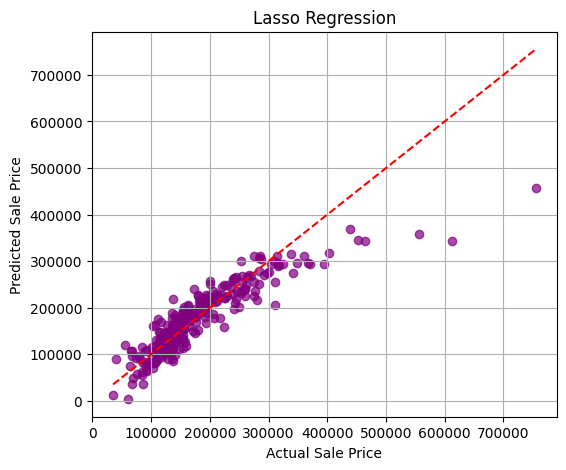

In [17]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Lasso Regression')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


**COMPARISON**

In [7]:
results = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2_simple, r2_multi, r2_ridge, r2_lasso],
    'RMSE': [rmse_simple, rmse_multi, rmse_ridge, rmse_lasso]
})

results


,Model,R² Score,RMSE
0,Simple Linear Regression,0.554263,58471.756526
1,Multiple Linear Regression,0.793865,39763.295266
2,Ridge Regression,0.793403,39807.843933
3,Lasso Regression,0.793865,39763.297972
